# SETUP/DATA WRANGLING

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000)
df = pd.read_csv("wireshark1.csv", index_col='No.')

In [3]:
#Data Wrangling
df.loc[df['Protocol'] == 'ARP', 'ProtocolNumber'] = '1'
df.loc[df['Protocol'] == 'UDP', 'ProtocolNumber'] = '2'
df.loc[df['Protocol'] == 'SSDP', 'ProtocolNumber'] = '3'
df.loc[df['Protocol'] == 'IGMPv3', 'ProtocolNumber'] = '4'
df.loc[df['Protocol'] == 'DHCPv6', 'ProtocolNumber'] = '5'
df.loc[df['Protocol'] == 'DNS', 'ProtocolNumber'] = '6'
df.loc[df['Protocol'] == 'HTTP', 'ProtocolNumber'] = '7'
df.loc[df['Protocol'] == 'ICMP', 'ProtocolNumber'] = '8'
df.loc[df['Protocol'] == 'ICMPv6', 'ProtocolNumber'] = '9'
df.loc[df['Protocol'] == 'TCP', 'ProtocolNumber'] = '10'
df.loc[df['Protocol'] == 'LLMNR', 'ProtocolNumber'] = '11'
df.loc[df['Protocol'] == 'MDNS', 'ProtocolNumber'] = '12'
df.loc[df['Protocol'] == 'NTP', 'ProtocolNumber'] = '13'
df.loc[df['Protocol'] == 'XID', 'ProtocolNumber'] = '14'
df.loc[df['Protocol'] == 'BROWSER', 'ProtocolNumber'] = '15'
df.loc[df['Protocol'] == 'NBNS', 'ProtocolNumber'] = '16'

#Assigning each Source IP a ID
df['id'] = df.groupby('Source').ngroup()

#Changing SPort and DPort NaN Values to 0
df['SPort'] = df['SPort'].fillna(0)
df['DPort'] = df['DPort'].fillna(0)

#Converting Values to Int to remove decimal place
df['SPort'] = df['SPort'].astype(int)
df['DPort'] = df['DPort'].astype(int)



#Assigning dfdos to df
dfdos = df

#Creating column total requests
df['Totalrequests'] = df.groupby('Source')['Source'].transform('count')

#Removing Unnecessary data for DOS
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.117'].index, inplace=True)
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.218'].index, inplace=True)
#dfdos = dfdos[dfdos['Protocol'] != 'DNS']
#dfdos = dfdos[dfdos['Protocol'] != 'ARP']
#dfdos = dfdos[dfdos['Protocol'] != 'XID']
#dfdos = dfdos[dfdos['Protocol'] != 'NTP']
#dfdos = dfdos[dfdos['Protocol'] != 'DHCPv6']
#dfdos = dfdos[dfdos['Protocol'] != 'SSDP']
#dfdos = dfdos[dfdos['Protocol'] != 'IGMPv3']
#dfdos = dfdos[dfdos['Protocol'] != 'MDNS']
#dfdos = dfdos[dfdos['Protocol'] != 'LLMNR']
#dfdos = dfdos[dfdos['Protocol'] != 'BROWSER']
#dfdos = dfdos[dfdos['Protocol'] != 'ICMPv6']
#dfdos = dfdos[dfdos['Protocol'] != 'NBNS']
dfdos = dfdos.reset_index(drop=True)

# K MEANS CLUSTERING ON DOS ATTACK

In [4]:
from sklearn.preprocessing import StandardScaler
df_Short = dfdos[['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id']]
scale = StandardScaler()

scaled_dfdos = scale.fit_transform(df_Short)

In [5]:
#Function for Elbow Method
df_Short2 = scaled_dfdos

K= range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans=kmeans.fit(df_Short2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\donma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [6]:
#Viewing the WSS scores of the Clusters
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,17975.000000
1,2,11915.404539
2,3,9298.951548
3,4,6685.025809
4,5,5204.480336
5,6,4243.738199
6,7,3636.080510
7,8,3240.702785
8,9,2897.801371
9,10,2617.350342


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

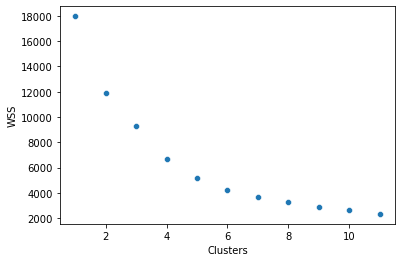

In [7]:
#Plot the Elbow 
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters,  marker = 'o')

In [8]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(scaled_dfdos)
y_predicted

array([2, 2, 2, ..., 1, 1, 3])

In [9]:
#CHECK DOS CLUSTER
dfdos['cluster']=y_predicted
#CHANGE CLUSTER VARIABLE TO FIND DOS CLUSTER
dfdoscheck = dfdos[dfdos.cluster==2]
dfdoscheck = dfdoscheck.sort_values(by=['Protocol'])
dfdoscheck = dfdoscheck.reset_index(drop=True)
dfdoscheck

,Time,Source,Destination,Protocol,Length,Info,TimeDiff,SPort,DPort,ProtocolNumber,id,Totalrequests,cluster
0,0.000000,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.148? Tell 192.168.0.218,0.000000e+00,0,0,1,215,1174,2
1,145.407577,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.80? Tell 192.168.0.218,3.122980e-02,0,0,1,215,1174,2
2,146.399173,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.81? Tell 192.168.0.218,2.149859e-01,0,0,1,215,1174,2
3,146.420296,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.192? Tell 192.168.0.218,1.528800e-05,0,0,1,215,1174,2
4,146.431368,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.80? Tell 192.168.0.218,1.107250e-02,0,0,1,215,1174,2
5,147.423925,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.192? Tell 192.168.0.218,2.207329e-03,0,0,1,215,1174,2
6,147.447862,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.164? Tell 192.168.0.218,8.910000e-06,0,0,1,215,1174,2
7,145.376347,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.81? Tell 192.168.0.218,3.583076e-01,0,0,1,215,1174,2
8,148.479895,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.164? Tell 192.168.0.218,3.220543e-02,0,0,1,215,1174,2
9,149.503719,PcsCompu_bd:40:f6,Broadcast,ARP,42,Who has 192.168.0.164? Tell 192.168.0.218,3.494800e-05,0,0,1,215,1174,2


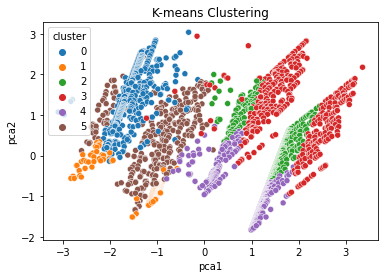

In [10]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=5).fit_transform(scaled_dfdos)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3','pca4','pca5'])


ax = sns.scatterplot(x="pca1", y="pca2", palette = "tab10", hue=dfdos['cluster'], data=results)

plt.title('K-means Clustering')
plt.show()

In [11]:
pca = PCA()
pca.fit(scaled_dfdos)
pca.explained_variance_ratio_

array([0.38545754, 0.22946778, 0.17115992, 0.14583029, 0.06808446])

In [12]:
dfdos['Attack'] = 'Normal'
dfdos.loc[dfdos['Protocol'] == 'ICMP', 'Attack'] = 'DOS'



# DECISION TREE ON DOS ATTACK USING K MEANS CLUSTERS

In [13]:
dfdos['Attack'] = 'Normal'
dfdos.loc[dfdos['Protocol'] == 'ICMP', 'Attack'] = 'DOS'

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
dt = dfdos[['cluster']]
x = dt
y = dfdos['Attack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=12)
clf = clf.fit(x_train, y_train)

In [17]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [18]:
#CONFUSION MATRIX TEST DATA
predictions = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Normal','DOS'])

array([[913,  19],
       [  0, 255]], dtype=int64)

In [19]:
#TEST DATA ACCURACY
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9839932603201348

In [20]:
#TRAIN DATA ACCURACY
predictions2 = clf.predict(x_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predictions2)

0.9808970099667774

In [21]:
#CONFUSION MATRIX TEST DATA
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Normal','DOS'])

array([[913,  19],
       [  0, 255]], dtype=int64)

In [22]:
x_test

,cluster
2842,1
318,5
1764,3
938,0
1863,5
31,0
2629,4
443,0
1265,3
2743,0


In [23]:
#CONFUSION MATRIX TRAIN DATA
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predictions2, labels=['Normal','DOS'])

array([[1855,   46],
       [   0,  507]], dtype=int64)

In [24]:
feature_names = x.columns
feature_names

Index(['cluster'], dtype='object')

In [25]:
clf.feature_importances_

array([1.])

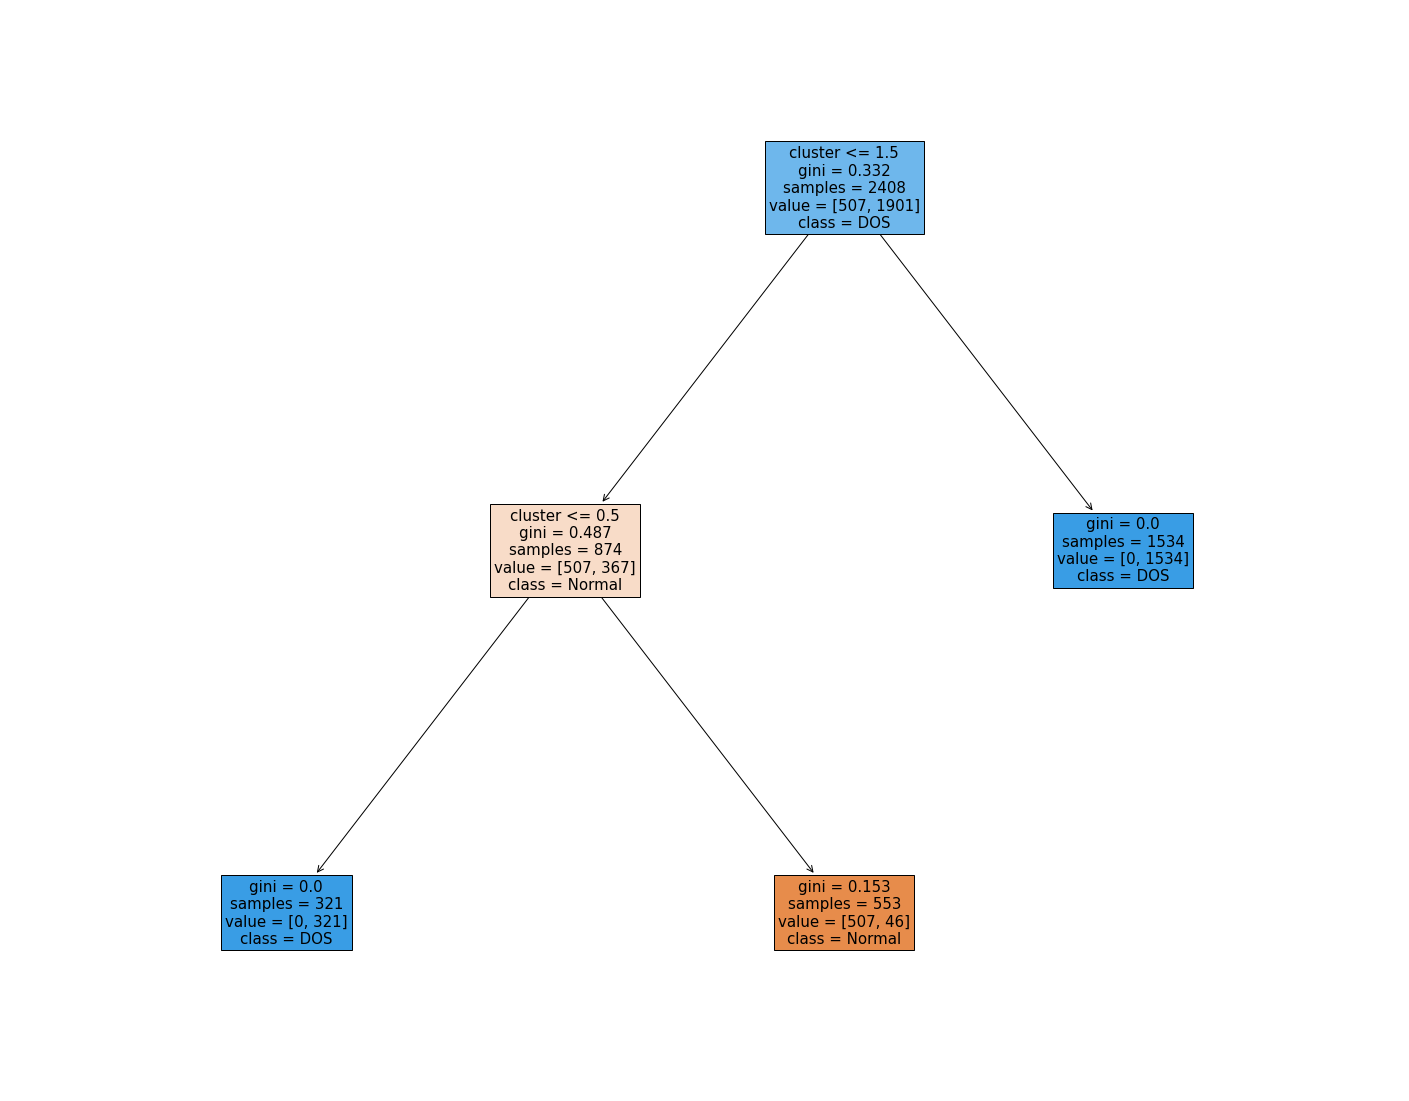

In [26]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names=feature_names,
                  class_names={0:'Normal', 1:'DOS'},
                  filled=True,
                  fontsize=15)

In [27]:
#Adding all decision tree predicted data to make bar graph against actual data
dtbartest = x_test
dtbartest['predicted'] = predictions
dtbartrain = x_train
dtbartrain['predicted'] = predictions2

C:\Users\donma\AppData\Local\Temp/ipykernel_9876/1537299969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtbartest['predicted'] = predictions
C:\Users\donma\AppData\Local\Temp/ipykernel_9876/1537299969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtbartrain['predicted'] = predictions2


In [28]:
finaldt = pd.concat([dtbartest, dtbartrain])

predicted
DOS        827
Normal    2768
dtype: int64

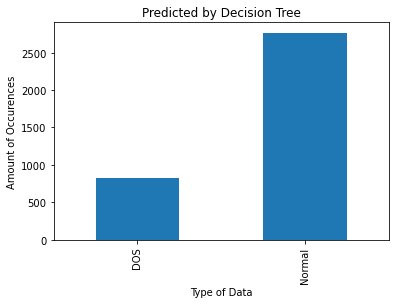

In [29]:
#Bar Graph of Predicted Occurences including Exact Number
predicted_bardata = finaldt.groupby('predicted').size()
predicted_bardata.plot(kind="bar",xlabel="Type of Data",
ylabel="Amount of Occurences", title="Predicted by Decision Tree")
predicted_bardata

Attack
DOS        762
Normal    2833
dtype: int64

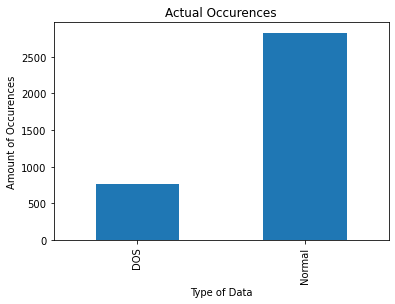

In [30]:
#BAR Graph of Actual Occurences including Exact Number
actual_bardata = dfdos.groupby('Attack').size()
actual_bardata.plot(kind="bar",xlabel="Type of Data",
ylabel="Amount of Occurences", title="Actual Occurences")
actual_bardata

In [31]:
#Add Predicted Data to DFDOS table
dfdos['predicted'] = finaldt['predicted']

In [34]:
#Display Rows of wrong data prediction
wrongpredict = dfdos[dfdos['Attack'] != dfdos['predicted']]
wrongpredict = wrongpredict.reset_index(drop=True)
wrongpredict

,Time,Source,Destination,Protocol,Length,Info,TimeDiff,SPort,DPort,ProtocolNumber,id,Totalrequests,cluster,Attack,predicted
0,281.616483,192.168.0.106,192.168.0.218,TCP,60,14457 > 80 [SYN] Seq=0 Win=8192 Len=0,0.604879,14457,80,10,8,4,1,Normal,DOS
1,285.930382,192.168.0.166,192.168.0.218,TCP,60,7367 > 80 [SYN] Seq=0 Win=8192 Len=0,0.031378,7367,80,10,62,4,1,Normal,DOS
2,293.094977,192.168.0.142,192.168.0.218,TCP,60,2021 > 80 [SYN] Seq=0 Win=8192 Len=0,0.085613,2021,80,10,40,2,1,Normal,DOS
3,298.240320,192.168.0.165,192.168.0.218,TCP,60,48671 > 80 [SYN] Seq=0 Win=8192 Len=0,0.032743,48671,80,10,61,2,1,Normal,DOS
4,300.315375,192.168.0.16,192.168.0.218,TCP,60,45894 > 80 [SYN] Seq=0 Win=8192 Len=0,0.023120,45894,80,10,55,2,1,Normal,DOS
5,300.375888,192.168.0.172,192.168.0.218,TCP,60,9910 > 80 [SYN] Seq=0 Win=8192 Len=0,0.032284,9910,80,10,66,1,1,Normal,DOS
6,304.581228,192.168.0.173,192.168.0.218,TCP,60,35240 > 80 [SYN] Seq=0 Win=8192 Len=0,0.028318,35240,80,10,67,1,1,Normal,DOS
7,306.647440,192.168.0.167,192.168.0.218,TCP,60,2360 > 80 [SYN] Seq=0 Win=8192 Len=0,0.019133,2360,80,10,63,1,1,Normal,DOS
8,312.797064,192.168.0.110,192.168.0.218,TCP,60,28569 > 80 [SYN] Seq=0 Win=8192 Len=0,0.028869,28569,80,10,12,2,1,Normal,DOS
9,324.074575,192.168.0.160,192.168.0.218,TCP,60,47894 > 80 [SYN] Seq=0 Win=8192 Len=0,0.011355,47894,80,10,56,4,1,Normal,DOS


In [64]:
#Calculate percentage of correctly predicted data
percentagewrong = len(wrongpredict.index)
percentagewhole = len(dfdos.index)
quotient =  100 / percentagewhole
wrongpercentage = quotient * percentagewrong
overallpercentage = 100 - wrongpercentage
overallpercentage

98.19193324061196

# DECISION TREE Using Multiple Table Features

In [113]:
dfdos['Attack'] = 'Normal'
dfdos.loc[dfdos['Protocol'] == 'ICMP', 'Attack'] = 'DOS'
from sklearn.model_selection import train_test_split
dt = dfdos[['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id']]
x = dt
y = dfdos['Attack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10)

In [114]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=12)
clf = clf.fit(x_train, y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [115]:
#CONFUSION MATRIX TEST DATA
predictions = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Normal','DOS'])

array([[276,   0],
       [  0,  84]], dtype=int64)

In [116]:
#TEST DATA ACCURACY
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [117]:
feature_names = x.columns
feature_names

Index(['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id'], dtype='object')

In [118]:
clf.feature_importances_

array([0.        , 0.        , 0.00186326, 0.54488691, 0.45324982])

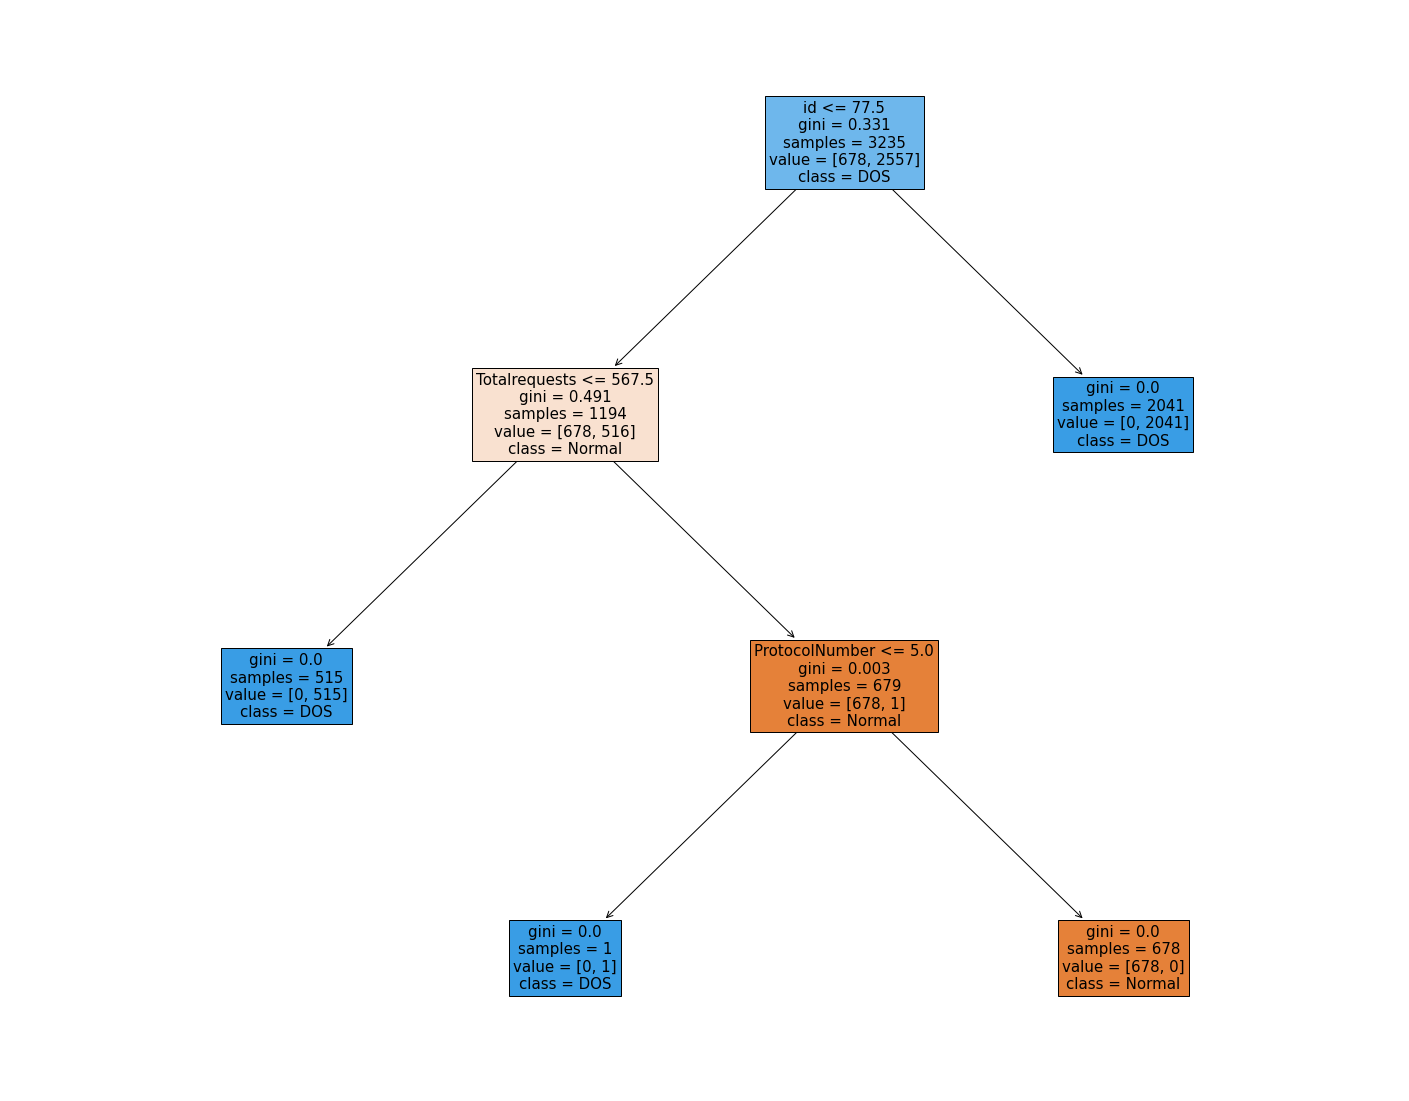

In [119]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names=feature_names,
                  class_names={0:'Normal', 1:'DOS'},
                  filled=True,
                  fontsize=15)